In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import cPickle as pickle
import gefry2

The shapes are stored as part of the spec file, so you have to load it in.

In [4]:
with open('./spec.pkl') as f:
    P, obs, sigma = pickle.load(f)

Plotting the Shapely shapefiles with Matplotlib is a bit tedious, you need to install the [descartes](https://pypi.python.org/pypi/descartes) helper library, which converts Shapely shapes to Matplotlib patches.

Load that library and some helpers from Shapely.

In [5]:
import shapely as S
import shapely.geometry as G
import descartes

Exctract the shapes, detector locations and source locations from the problem definition.

In [6]:
P.detectors[0].loc

array([ 68.7401029 ,  35.76719126])

In [7]:
buildings = P.domain.geometry # Shapely geometries
(source_x, source_y) = P.source.loc # (x, y) position of source
detector_locs = np.array([i.loc for i in P.detectors]) # [(x, y)], array of x-y pairs

Get the domain limits as the bounding box of the buildings.

Also compute the correct aspect ratio to match the domain dimensions (optional).

In [8]:
(xmin, ymin, xmax, ymax) = S.ops.cascaded_union(buildings).bounds

aspect_ratio = abs(xmax - xmin) / abs(ymax - ymin)

To plot, you add the shapes to the figure as patches.

If it gives you a `FutureWarning` about elementwise comparisons you can ignore it.

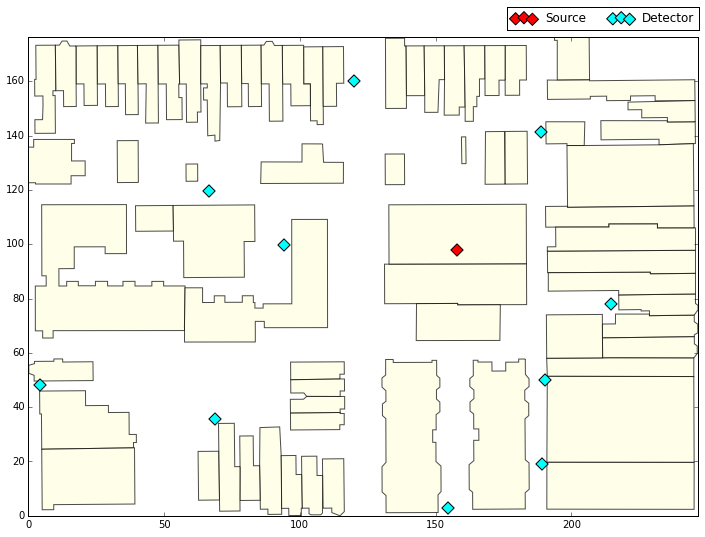

In [10]:
BASE_DIM = 12.
fig = plt.figure(figsize=(BASE_DIM, BASE_DIM / aspect_ratio))
ax = fig.add_subplot(111)

# Generate the patches, this has to be done for every figure (you can't reuse patches in multiple figures)
patches = [descartes.PolygonPatch(i, fc='lightyellow', ec='black', alpha=0.7, zorder=0) for i in buildings]

for patch in patches:
    ax.add_patch(patch)
    
ax.scatter([source_x], [source_y], s=75, marker="D", facecolors="red", label="Source")
ax.scatter(detector_locs[:, 0], detector_locs[:, 1], s=75, marker="D", facecolors="cyan", label="Detector")
    
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

ax.legend(ncol=2, bbox_to_anchor=(1.01, 1.075))

fig.show()